In [1]:
%autosave 20
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

from astropy.io import fits
import numpy.ma as ma
import matplotlib.patches as mpatches
from matplotlib.path import Path
from matplotlib.text import OffsetFrom

from matplotlib import animation



Autosaving every 20 seconds


<IPython.core.display.Javascript object>


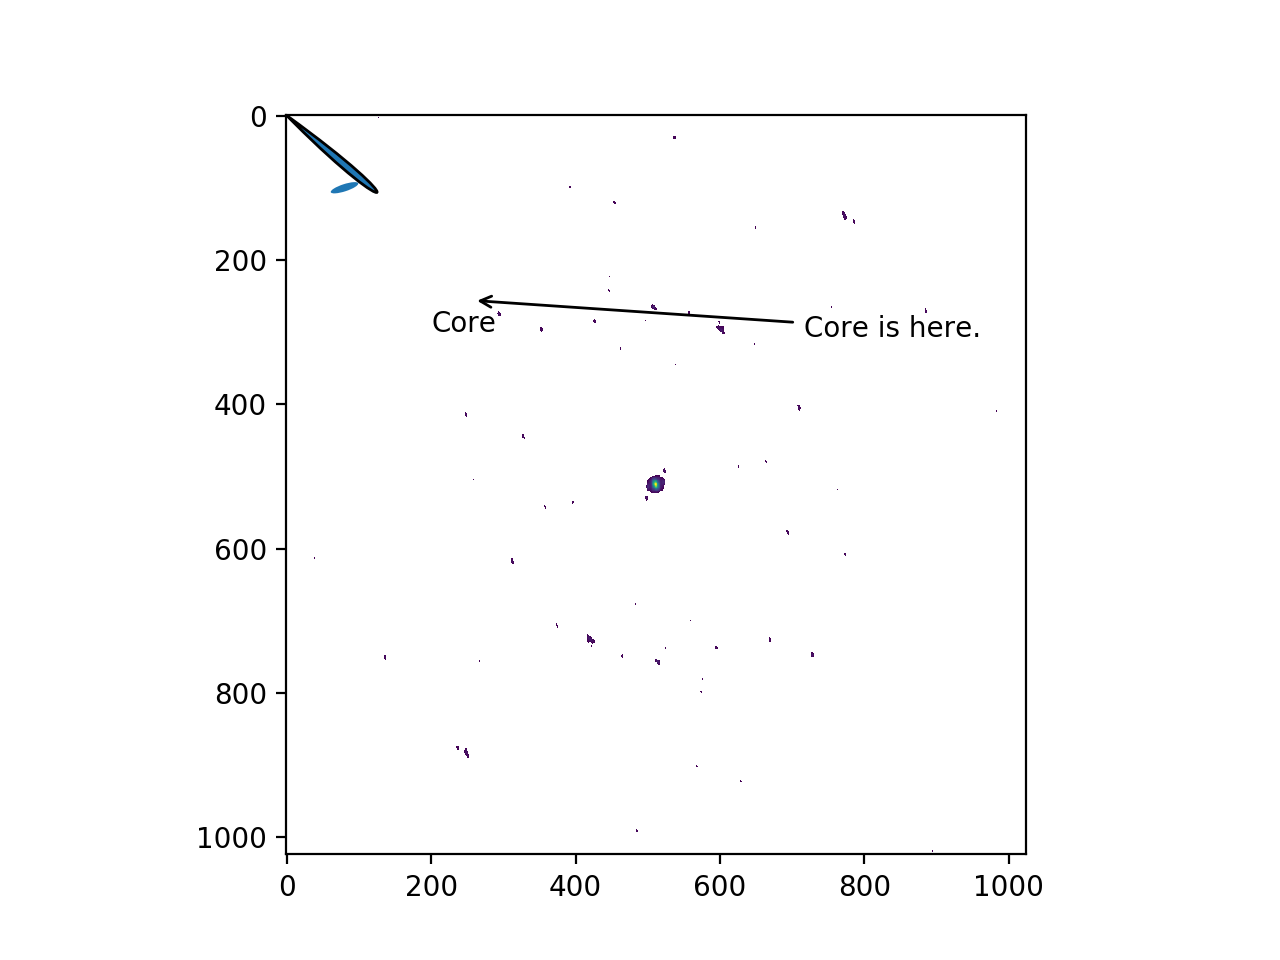

Text(0.7,0.7,'Core is here.')

In [2]:
data = fits.open('image.fits')
image = np.squeeze(data[0].data)

fig, ax = plt.subplots()
image = ma.masked_less(image, 5*np.std(image[0:200,0:200]))
ax.imshow(image)

ell = mpatches.Ellipse(xy = [80,100], width = 40, 
                       height = 10, angle = -18 )
ax.add_patch(ell)
plt.text(200, 300, 'Core')

path_data = [
    (Path.MOVETO, [0,0]),
    (Path.CURVE4, [180, 130]),
    (Path.CURVE4, [150, 150]),
    (Path.LINETO, [10,10]),
    (Path.CLOSEPOLY, [0,0])
]

codes, dots = zip(*path_data)
path = Path(dots, codes)
patch = mpatches.PathPatch(path)
ax.add_patch(patch)

ax.annotate(
    'Core is here.', xy=(256,256), xycoords= 'data',
    xytext = (0.7, 0.7), textcoords = 'axes fraction',
    arrowprops = dict(arrowstyle= '->',facecolor = 'black')
                     )


<IPython.core.display.Javascript object>


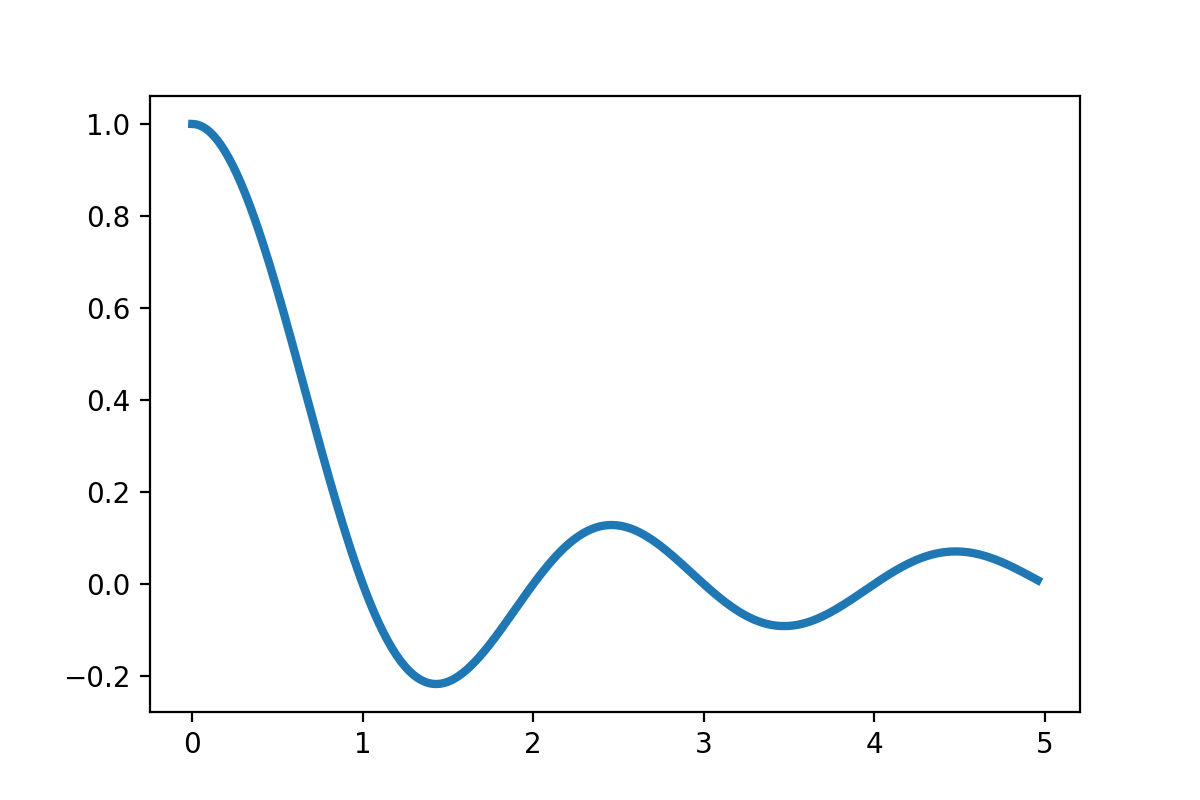

In [3]:
fig = plt.figure(figsize=(6,4))
n = 500
x = np.linspace(0, 2*3.14, n)
y = np.sinc(x)
m = 5
def ani(i, x, y, m = 5):
    plt.clf()
    plt.plot(x[:i*m], y[:i*m], lw = 3)

anim = animation.FuncAnimation(fig, ani, fargs = (x, y), frames = n//m, 
                     interval = 10  )
anim.save('asd.mp4')